# Geometric Numerical Integration

### Problem: Given an initial condition $(q_0, p_0)$, compute the dynamics give for the hamilton equations

\begin{equation}
\begin{cases} 
\dot{q} = \frac{\partial H}{\partial p} 
        =\frac{\partial K}{\partial p} \\ 
\dot{p} = - \frac{\partial H}{\partial q} 
        = - \frac{\partial V}{\partial q} \\ 
        (q(t_0), p(t_0)) = (q_0, p_0) 
\end{cases},
\end{equation}

for a hamiltonian $H(q,p) = V(q) + K(p)$.

### Non-symplectic Euler method. 

Let $\epsilon>0$ a step size, the standard Euler method, or non-symplectic Euler method, is the following algorithm

\begin{cases}
q (t_{k+1}) = q(t_k) + \tau \frac{\partial K}{\partial p} \big( p (t_k) \big)   \\
p ( t_{k+1} ) = p(t_k) - \tau \frac{\partial V}{\partial q} \big( q (t_k) \big),  
\end{cases}

where $t_k=k \epsilon$. 

In [1]:
# NON-SYMPLECTIC EULER: General code in for 2-dimensional problems

# q_0, p_0 <- Initial conditions
# ϵ <- Step size
# N <- Iterations
# ∂_K <- Kinetic's gradient
# ∂_V <- Potential's gradient

@inline function euler_1(q_0::Float64, p_0::Float64, ϵ::Float64, N::Int64, ∂_K::Function, ∂_V::Function)
    q = zeros(N+1) # Position's list
    p = zeros(N+1) # Momentum's list
    
    #Initial condition
    q[1] = q_0 
    p[1] = p_0
    
    #Hamiltonian numerical dynamics
    for i in 1:N
        # Position update
        q[i+1] = q[i] + ϵ * ∂_K(p[i])
        # Momentum update
        p[i+1] = p[i] - ϵ * ∂_V(q[i])
    end
    
    # Return hamiltonian numerical dynamics
    return q, p
end;

### 1-dimensional harmonic oscillator

The hamiltonian for the 1-dimensional harmonic oscilator is 

\begin{equation}
H = \frac{p^2}{2m} + \frac{1}{2}kq^2,
\end{equation}

where $m$ and $k$ are constants. In the following example we are gonna solve the hamilton equations for the 1-dimensional harmonic oscillator when $m=k=1$. 

In [2]:
#1-DIMENSIONAL HARMONIC OSCILATOR USING NON-SYMPLECTIC EULER

grad_K(p) = p # Kintetic's gradient
grad_V(q) = q # Potential's gradient

#Algorithm parameters

p_0 = 10.0 #Initial position
q_0 = -10.0 #Initial momentum

ϵ = 0.2 #Step size

N = 70 #Interations

#Compute the hamiltonian dynamics
G = euler_1(p_0, q_0, ϵ, N, grad_K, grad_V) ;

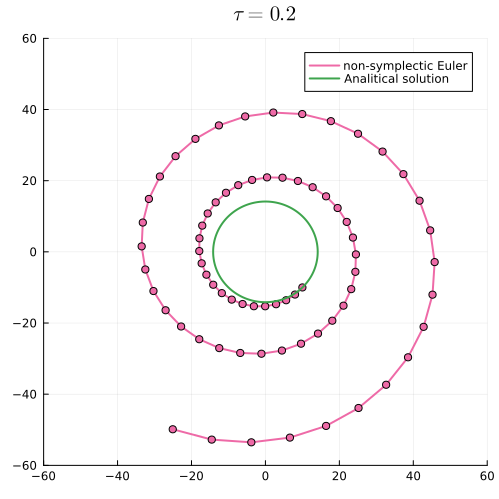

In [3]:
#Dynamics visualization

using Plots # Import visualization packege

#Plot numerical dynamics
plot(G, xlims=(-60, 60), ylims=(-60,60), linewidth=2, color = "hotpink2", label = "non-symplectic Euler")
    
scatter!(G, xlims=(-60, 60), ylims=(-60,60), label = "", color = "hotpink2")

#Plot the analitical solution
T = range(0, 2*π, length=1000)

plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Analitical solution")

title!("\$ \\tau = 0.2 \$")

plot!(size=(500,500))

### Symplectic Euler method. 

Let $\epsilon>0$ a step size, the symplectic Euler method is the following algorithm

\begin{cases}
q (t_{k+1}) = q(t_k) + \tau \frac{\partial K}{\partial p} \big( p (t_k) \big)   \\
p ( t_{k+1} ) = p(t_k) - \tau \frac{\partial V}{\partial q} \big( q (t_{k+1}) \big) ,
\end{cases}

where $t_k=k \epsilon$.

In [4]:
# SYMPLECTIC EULER: General code in for 2-dimensional problems

# q_0, p_0 <- Initial conditions
# ϵ <- Step size
# N <- Iterations
# ∂_K <- Kinetic's gradient
# ∂_V <- Potential's gradient

@inline function euler_2(q_0::Float64, p_0::Float64, τ::Float64, N::Int64, ∂_K::Function, ∂_V::Function)
    
    q = zeros(N+1) # Position's list
    p = zeros(N+1) # Momentum's list
    
    #Initial conditions
    q[1] = q_0 #Initial position
    p[1] = p_0 #Initial momentum

    #Hamiltonian numerical dynamics
    for i in 1:N
        # Position update
        q[i+1] = q[i] + ϵ * ∂_K(p[i])
        # Momentum update 
        p[i+1] = p[i] - ϵ * ∂_V(q[i+1])
    end
    
    # Return hamiltonian numerical dynamics
    return q, p
end;

In [5]:
#1-DIMENSIONAL HARMONIC OSCILATOR USING NON-SYMPLECTIC EULER

grad_K(p) = p # Kintetic's gradient
grad_V(q) = q # Potential's gradient

#Algorithm parameters

p_0 = 10.0 #Initial position
q_0 = -10.0 #Initial momentum

ϵ = 0.2 #Step size

N = 40 #Iterations

#Compute the hamiltonian dynamics
G = euler_2(p_0, q_0, ϵ, N, grad_K, grad_V);

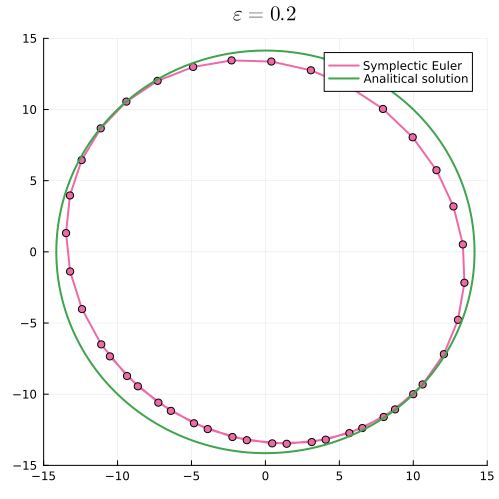

In [6]:
#Dynamics visualization

using Plots # Import visualization packege

#Plot numerical dynamics
plot(G, xlims=(-15, 15), ylims=(-15,15), linewidth=2, color = "hotpink2", label = "Symplectic Euler")
    
scatter!(G, xlims=(-15, 15), ylims=(-15,15), label = "", color = "hotpink2")

#Plot the analitical solution
T = range(0, 2*π, length=1000)

plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2, label="Analitical solution")

title!("\$ \\epsilon = 0.2 \$")

plot!(size=(500,500))

# Leapfrog method

Let $\epsilon>0$ a step size, the leapfrog is the following algorithm

\begin{equation}
\begin{cases} q(t_{k+1}) 
= q(t_k) + \epsilon p(t_{k + \frac{1}{2} }) \\ 
p(t_{k+1}) 
= p(t_{k + \frac{1}{2} } )- \frac{\epsilon }{2}  \frac{\partial V}{\partial q} (q(t_{k+1})), 
\end{cases}
\end{equation}

where 

$$ p(t_{k + \frac{1}{2}}) = p(t_k) - \frac{\epsilon }{2} \frac{\partial V}{\partial q} (q(t_{k}))   $$.

In [7]:
# LEAPFROG: General code in for 2-dimensional problems

# q_0, p_0 <- Initial conditions
# ϵ <- Step size
# N <- Iterations
# ∂_K <- Kinetic's gradient
# ∂_V <- Potential's gradient

@inline function salto_rana(q_0::Float64, p_0::Float64, ϵ::Float64, N::Int64,  ∂_K::Function, ∂_V::Function)
    q = zeros(N+1) # Positions list
    p = zeros(N+1) # Momentum's list
    s = zeros(N)   # Itermediate steps
    
    #Initial conditions
    q[1] = q_0
    p[1] = p_0
    
    #Hamiltonian numerical dynamics
    for i in 1:N
        #Intermediate update
        s[i] = p[i] - (ϵ/2)*∂_V(q[i])
        #Position update
        q[i+1] = q[i] + ϵ*s[i]
        #Momentum update
        p[i+1] = s[i] - (ϵ/2)*∂_V(q[i+1])
    end
    
    # Return hamiltonian numerical dynamics
    return q, p
end

salto_rana (generic function with 1 method)

In [8]:
#1-DIMENSIONAL HARMONIC OSCILATOR USING NON-SYMPLECTIC EULER

grad_K(p) = p # Kintetic's gradient
grad_V(q) = q # Potential's gradient

#Algorithm parameters

p_0 = 10.0 #Initial position
q_0 = -10.0 #Initial momentum

ϵ = 0.2 #Step size

N = 40 #Iterations

#Compute the hamiltonian dynamics
G = salto_rana(p_0, q_0, ϵ, N, grad_K, grad_V);

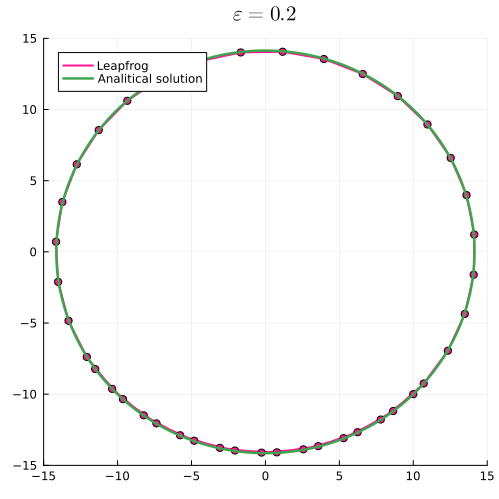

In [9]:
#Dynamics visualization

plot(G, xlims=(-15, 15), ylims=(-15,15), linewidth=2, color = "deeppink1", label = "Leapfrog")

using Plots # Import visualization packege
    
scatter!(G, xlims=(-15, 15), ylims=(-15,15), label = "", color = "deeppink1")

#Plot the analitical solution

T = range(0, 2*π, length=1000)

plot!( [sqrt(200)*cos(t) for t in T], [sqrt(200)*sin(t) for t in T], linewidth=2.5, label="Analitical solution")

title!("\$ \\epsilon = 0.2 \$")

plot!(size=(500,500))
    
#savefig("Salto_de_rana.png")

### Lepafrog for more arbitrary dimensions

Let's consider the $n$-dimenssional hamiltonian 

\begin{equation}
H(q, p) = V(q) + \frac{1}{2}p^T \Sigma ^{-1} p,
\end{equation}

where $V$ is any potential and $\Sigma$ si a semidefinite matrix. This kind of hamiltonians are used in Hamiltonian Monte Carlo, so is important to solve it. 

In [10]:
# LEAPFROG: General code in for n-dimensional problems

# q_0, p_0 <- Initial conditions
# ϵ <- Step size
# N <- Iterations
# ∂_V <- Potential's gradient

miFloat = Union{Array{Float64},Float64}

@inline function leap_frog(q_0::miFloat,p_0::miFloat,ϵ::Float64,N::Int64,grad_V::Function)
    
    q_vec = [ zeros(length(q)) for _ in 1:N ] #Positions list
    p_vec = [ zeros(length(q)) for _ in 1:N ] #Momentums list
            
    #Intermediate position update        
    p = p .- 0.5 .* ϵ .* grad_V(q)
    for i in 1:(N-1)
                
        # Position update
        q = q .+ ϵ .* p
        q_vec[i] = q
                
        # Momentum update
        p = p .- ϵ .* grad_V(q)
        p_vec[i] = p
    end
                
    #Final momentum update            
    q = q .+ ϵ .* p
    q_vec[L] = q
                
    #Final position update            
    p = p .- 0.5 .* ϵ .* grad_V(q)
    p_vec[L] = p
                
    # Return hamiltonian numerical dynamics            
    return q_vec, p_vec
end

leap_frog (generic function with 1 method)